## 1. Import the required libraries and load the training and testing dataset. 

#####  See the value of multiple statements at once.
#####  output for all commands in python jupyter notebook.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##### Import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

##### Checking the current working directory.

In [ ]:
pwd

'/content/drive/My Drive/data'

##### Importing os library to change the directory where the folder resides in the drive.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/data')

##### Listing out the number of files in the folder.

In [ ]:
!ls

test.csv  test_label.csv  train.csv  train_label.csv


##### INDEPENDENT VARIABLES and DEPENDENT VARIABLES are in seperate files for training & tesing data.
##### Reading the IDV and DV of training and testing data using pandas read_csv() function.

In [ ]:
training_idv = pd.read_csv('train.csv')
training_dv = pd.read_csv('train_label.csv')
testing_idv = pd.read_csv('test.csv')
testing_dv = pd.read_csv('test_label.csv')
training_idv.head()
training_dv.head()
testing_idv.head()
testing_dv.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


,504
0,5
1,139
2,209
3,184
4,791


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


,256
0,87
1,11
2,84
3,668
4,53


##### DV files - train_label.csv & test_label.csv doesn't have any column name to prevent that said header - None and given the column name explicitly as 'Total_booking'.

In [ ]:
training_dv = pd.read_csv('train_label.csv',header=None,names=['Total_booking'])
training_dv
testing_dv = pd.read_csv('test_label.csv',header=None,names=['Total_booking'])
testing_dv

,Total_booking
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


,Total_booking
0,256
1,87
2,11
3,84
4,668
...,...
2173,3
2174,144
2175,159
2176,29


##### For developing the model need to combine IDV & DV of training and testing data.
##### Using pandas concat function combining the IDV & DV.

In [ ]:
training_data = pd.concat([training_idv,training_dv],axis=1)
training_data
testing_data = pd.concat([testing_idv,testing_dv],axis=1)
testing_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668
...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29


## 2. Analyze the dataset and write your observations 
### a. Check the shape of the training and testing set
### b. Print the data types of each column
### c. Check the missing values present in the dataset

##### Shape of the training and testing set

In [ ]:
print("Shape of training set is:",training_data.shape)
print("No of obeservations: {}".format(training_data.shape[0]))
print("No of Features: {}".format(training_data.shape[1]))
print("-----------------------------------")
print("Shape of testing set:",testing_data.shape)
print("No of obeservations: {}".format(testing_data.shape[0]))
print("No of Features: {}".format(testing_data.shape[1]))

Shape of training set is: (8708, 10)
No of obeservations: 8708
No of Features: 10
-----------------------------------
Shape of testing set: (2178, 10)
No of obeservations: 2178
No of Features: 10


##### Data types of each column using for loop.
##### OR 
##### Data types of each column using dataframe.info() function.

In [ ]:
cols = training_data.columns
for col in cols:
  print(str(col) + "  ---->    " + str(training_data[col].dtype))
training_data.info()

print('\n--------------------------------------------------\n')

cols = testing_data.columns
for col in cols:
  print(str(col) + "  ---->    " + str(testing_data[col].dtype))
testing_data.info()


datetime  ---->    object
season  ---->    object
holiday  ---->    int64
workingday  ---->    int64
weather  ---->    object
temp  ---->    float64
atemp  ---->    float64
humidity  ---->    int64
windspeed  ---->    float64
Total_booking  ---->    int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB

--------------------------------------------

#### Observation - 
##### 1. datetime column in string/object data type needs to convert it to datetime dtype.
##### 2. season, holiday, workingday and weather in string/object data type needs to convert it to category.

##### Checking null values in each column of training and testing data.

In [ ]:
print("Count of Null values in each column of Training data")
print(training_data.isna().sum())
print("\n-----------------------------------------\n")
print("Count of Null values in each column of Testing data")
print(testing_data.isna().sum())


Count of Null values in each column of Training data
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

-----------------------------------------

Count of Null values in each column of Testing data
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64


#### Observation - 
##### No null values in Training & Testing dataset.

## 3. Perform Feature Engineering: 
### a. Create new columns date, hour, weekDay, month from datetime column.
### b. Coerce the datatype of season, holiday, workingday, and weather to category.
### c. Drop the datetime column as we have already extracted useful features from it.

#### Converting datetime column datatype from string/ object to datetime datatype using pandas to_datetime() function.
#### Printing datatypes of each column of training & testing dataset after conversion.
#### Displaying first few rows of training & testing dataset.



In [ ]:
training_data['datetime'] = pd.to_datetime(training_data['datetime'],format='%m/%d/%Y %H:%M')
training_data.info()
training_data.head()
print('\n-------------------------------\n')
testing_data['datetime'] = pd.to_datetime(testing_data['datetime'],format='%m/%d/%Y %H:%M')
testing_data.info()
testing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   object        
 2   holiday        8708 non-null   int64         
 3   workingday     8708 non-null   int64         
 4   weather        8708 non-null   object        
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_booking  8708 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 680.4+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184



-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       2178 non-null   datetime64[ns]
 1   season         2178 non-null   object        
 2   holiday        2178 non-null   int64         
 3   workingday     2178 non-null   int64         
 4   weather        2178 non-null   object        
 5   temp           2178 non-null   float64       
 6   atemp          2178 non-null   float64       
 7   humidity       2178 non-null   int64         
 8   windspeed      2178 non-null   float64       
 9   Total_booking  2178 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 170.3+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


#### Creating new columns date, hour, weekDay, month from datetime column of training and testing dataset.
#### Appending newly created columns to training and testing dataset.
#### Displaying first few rows after appending newly added columns to training and testing dataset.

In [ ]:
training_data['date'] = training_data['datetime'].dt.date
training_data['hour'] = training_data['datetime'].dt.hour
training_data['weekday'] = training_data['datetime'].dt.weekday
training_data['month'] = training_data['datetime'].dt.month
training_data.head()
print('\n---------------------------------------------\n')
testing_data['date'] = testing_data['datetime'].dt.date
testing_data['hour'] = testing_data['datetime'].dt.hour
testing_data['weekday'] = testing_data['datetime'].dt.weekday
testing_data['month'] = testing_data['datetime'].dt.month
testing_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,2,9
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,3,1
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,4,11
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,1,9



---------------------------------------------



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10,11,3,5
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09,7,5,6
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06,20,6,3
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13,11,3,10
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02,12,5,6


#### Converting the datatype of season, holiday, workingday, and weather to category in training and testing dataset.
#### Displaying datatypes of each column of training and testing dataset after conversion.

In [ ]:
training_data['season'] = training_data['season'].astype('category')
training_data['holiday'] = training_data['holiday'].astype('category')
training_data['workingday'] = training_data['workingday'].astype('category')
training_data['weather'] = training_data['weather'].astype('category')
training_data['date'] = pd.to_numeric(pd.to_datetime(training_data['date']))
training_data.info()
print('\n--------------------------------------------\n')
testing_data['season'] = testing_data['season'].astype('category')
testing_data['holiday'] = testing_data['holiday'].astype('category')
testing_data['workingday'] = testing_data['workingday'].astype('category')
testing_data['weather'] = testing_data['weather'].astype('category')
testing_data['date'] = pd.to_numeric(pd.to_datetime(testing_data['date']))
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   category      
 2   holiday        8708 non-null   category      
 3   workingday     8708 non-null   category      
 4   weather        8708 non-null   category      
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_booking  8708 non-null   int64         
 10  date           8708 non-null   int64         
 11  hour           8708 non-null   int64         
 12  weekday        8708 non-null   int64         
 13  month          8708 non-null   int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(6)
memory usage: 71

#### Dropping the datetime column as we have already extracted useful features from it in training and testing dataset.
#### Dispalying first few training and testing dataset after dropping datetime column.

In [ ]:
training_data.drop('datetime',axis=1,inplace=True)
training_data.head()
print('\n----------------------------------------\n')
testing_data.drop('datetime',axis=1,inplace=True)
testing_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,1335916800000000000,19,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,1346803200000000000,4,2,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1294876800000000000,9,3,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,1321574400000000000,16,4,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,1315872000000000000,13,1,9



----------------------------------------



,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,1336608000000000000,11,3,5
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,1339200000000000000,7,5,6
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,1299369600000000000,20,6,3
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,1318464000000000000,11,3,10
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,1338595200000000000,12,5,6


## 4. Perform Outlier Analysis:
### a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference
### b. Remove the outliers present in the dataset

In [ ]:
training_data.describe()
testing_data.describe()

,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8.708000e+03,8708.000000,8708.000000,8708.000000
mean,20.243020,23.655552,61.649173,12.843891,193.007005,1.325047e+18,11.581190,3.015618,6.528709
std,7.813494,8.501107,19.199578,8.190314,181.552211,1.827242e+16,6.890534,2.006246,3.440879
min,0.820000,0.760000,0.000000,0.000000,1.000000,1.293840e+18,0.000000,0.000000,1.000000
25%,13.940000,16.665000,46.000000,7.001500,43.000000,1.309478e+18,6.000000,1.000000,4.000000
50%,20.500000,24.240000,61.000000,12.998000,148.000000,1.325549e+18,12.000000,3.000000,7.000000
75%,26.240000,31.060000,77.000000,16.997900,286.000000,1.341274e+18,18.000000,5.000000,10.000000
max,41.000000,45.455000,100.000000,56.996900,977.000000,1.355875e+18,23.000000,6.000000,12.000000


,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2.178000e+03,2178.000000,2178.000000,2178.000000
mean,20.182241,23.653214,62.835170,12.621496,185.845271,1.324432e+18,11.383379,3.007346,6.492654
std,7.704978,8.369721,19.401161,8.060062,179.431987,1.784138e+16,7.015466,1.998378,3.458952
min,3.280000,3.790000,0.000000,0.000000,1.000000,1.293840e+18,0.000000,0.000000,1.000000
25%,13.940000,16.665000,48.000000,7.001500,38.000000,1.309651e+18,5.000000,1.000000,3.000000
50%,20.500000,24.240000,63.000000,11.001400,136.000000,1.323778e+18,11.000000,3.000000,7.000000
75%,26.240000,31.060000,78.000000,16.997900,277.000000,1.339351e+18,18.000000,5.000000,10.000000
max,38.540000,44.695000,100.000000,56.996900,901.000000,1.355875e+18,23.000000,6.000000,12.000000


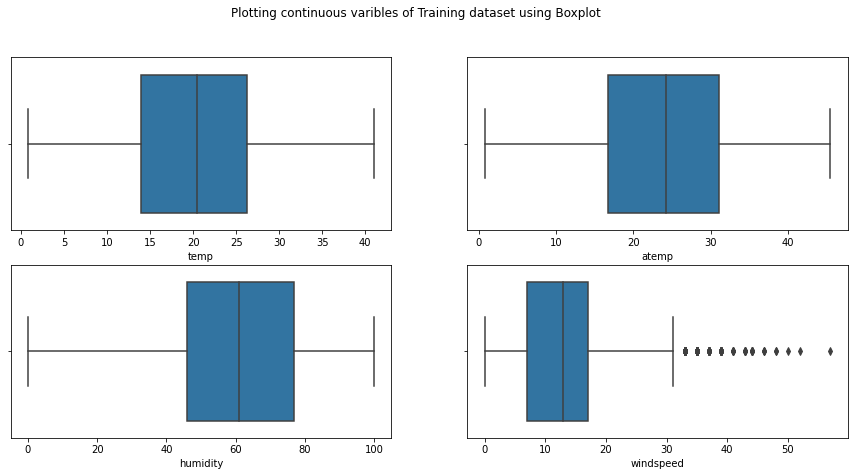


------------------------------------------



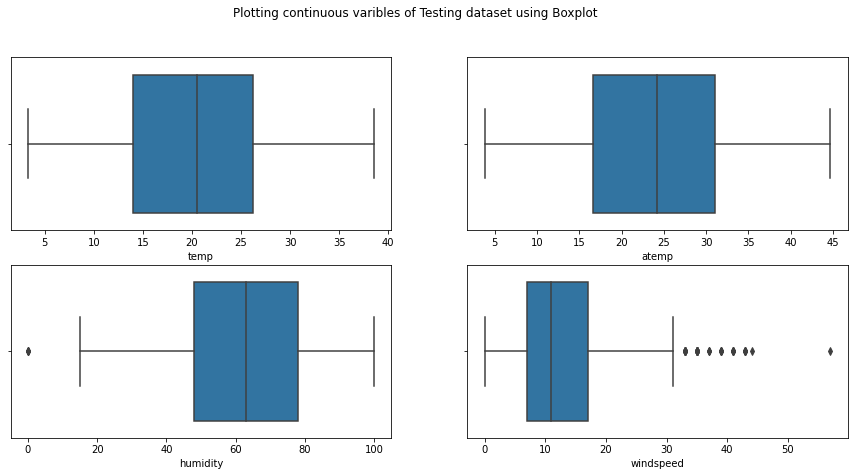

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7), sharey=True)
fig.suptitle('Plotting continuous varibles of Training dataset using Boxplot')
sns.boxplot(ax=axes[0,0],data=training_data,x='temp')
sns.boxplot(ax=axes[0,1],data=training_data,x='atemp')
sns.boxplot(ax=axes[1,0],data=training_data,x='humidity')
sns.boxplot(ax=axes[1,1],data=training_data,x='windspeed')
plt.show();

print('\n------------------------------------------\n')

fig, axes = plt.subplots(2, 2, figsize=(15, 7), sharey=True)
fig.suptitle('Plotting continuous varibles of Testing dataset using Boxplot')
sns.boxplot(ax=axes[0,0],data=testing_data,x='temp')
sns.boxplot(ax=axes[0,1],data=testing_data,x='atemp')
sns.boxplot(ax=axes[1,0],data=testing_data,x='humidity')
sns.boxplot(ax=axes[1,1],data=testing_data,x='windspeed')
plt.show();

In [ ]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

training_data_outliers = detect_outliers_iqr(training_data['windspeed'])
print("Outliers from IQR method for Training data: ", training_data_outliers)

testing_data_outliers = detect_outliers_iqr(testing_data['windspeed'])
print("Outliers from IQR method for Testing data: ", testing_data_outliers)


Outliers from IQR method for Training data:  [32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 

In [ ]:
training_median = np.median(training_data['windspeed'])
testing_median = np.median(training_data['windspeed'])
print("Median of Windspeed in Training data: ",training_median)
print("Median of Windspeed in Testing data: ",training_median)

Median of Windspeed in Training data:  12.998
Median of Windspeed in Testing data:  12.998


In [ ]:
training_data['windspeed'] = training_data['windspeed'].apply(lambda x: training_median if x in training_data_outliers else x)
testing_data['windspeed'] = testing_data['windspeed'].apply(lambda x: testing_median if x in testing_data_outliers else x)

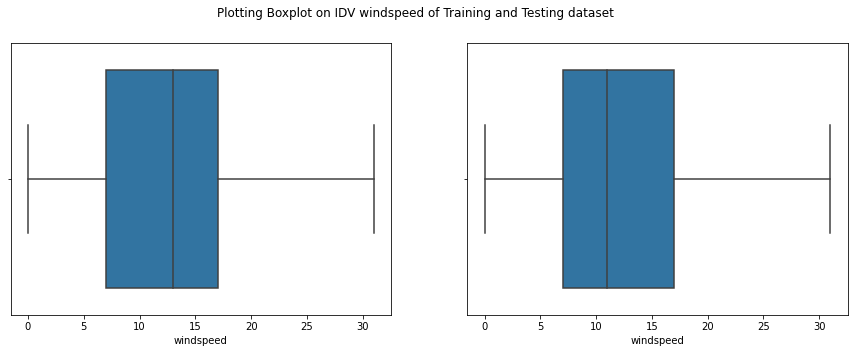

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Plotting Boxplot on IDV windspeed of Training and Testing dataset')
sns.boxplot(ax=axes[0],data=training_data,x='windspeed')
sns.boxplot(ax=axes[1],data=testing_data,x='windspeed')
plt.show();

#### Displaying percentage of labels of each categorical coulmn of Training and Testing dataset.

In [ ]:
print(round(training_data['season'].value_counts(normalize=True)*100,2))
print(round(training_data['holiday'].value_counts(normalize=True)*100,2))
print(round(training_data['workingday'].value_counts(normalize=True)*100,2))
print(round(training_data['weather'].value_counts(normalize=True)*100,2))

print('\n--------------------------------------\n')

print(round(testing_data['season'].value_counts(normalize=True)*100,2))
print(round(testing_data['holiday'].value_counts(normalize=True)*100,2))
print(round(testing_data['workingday'].value_counts(normalize=True)*100,2))
print(round(testing_data['weather'].value_counts(normalize=True)*100,2))

Summer    25.23
Fall      25.14
Winter    25.10
Spring    24.53
Name: season, dtype: float64
0    97.15
1     2.85
Name: holiday, dtype: float64
1    68.03
0    31.97
Name: workingday, dtype: float64
 Clear + Few clouds            66.07
 Mist + Cloudy                 26.14
 Light Snow, Light Rain         7.79
 Heavy Rain + Thunderstorm      0.01
Name: weather, dtype: float64

--------------------------------------

Spring    25.25
Winter    25.16
Fall      24.98
Summer    24.61
Name: season, dtype: float64
0    97.11
1     2.89
Name: holiday, dtype: float64
1    68.32
0    31.68
Name: workingday, dtype: float64
 Clear + Few clouds        66.07
 Mist + Cloudy             25.62
 Light Snow, Light Rain     8.31
Name: weather, dtype: float64


#### Plotting countplot for categorical coulmns of Training and Testing dataset.

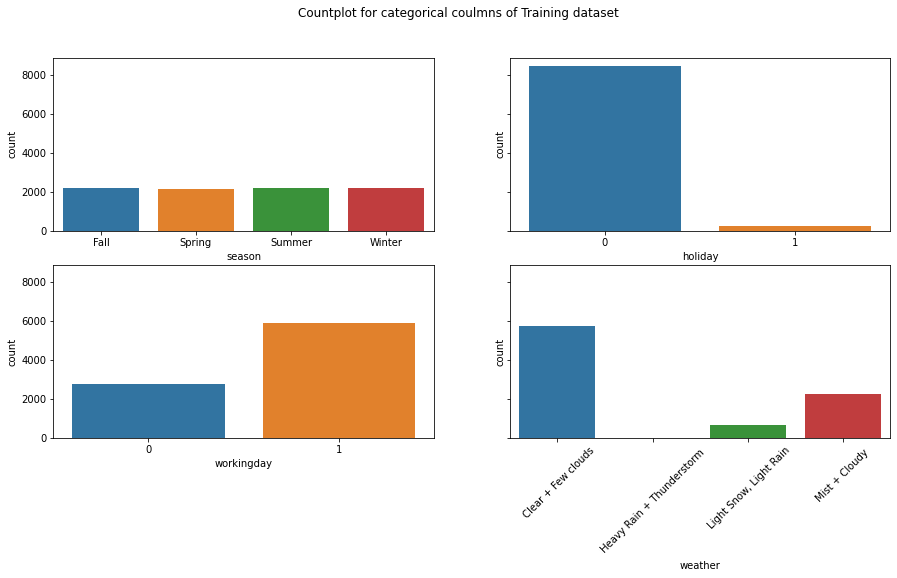

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7), sharey=True)
fig.suptitle('Countplot for categorical coulmns of Training dataset')
sns.countplot(ax=axes[0,0], x = 'season',data=training_data)
sns.countplot(ax=axes[0,1], x = 'holiday',data=training_data)
sns.countplot(ax=axes[1,0], x = 'workingday',data=training_data)
sns.countplot(ax=axes[1,1], x = 'weather',data=training_data)
plt.xticks(rotation=45)
plt.show();

In [ ]:
training_data['weather'] = training_data['weather'].str.strip().astype('category')
testing_data['weather'] = testing_data['weather'].str.strip().astype('category')

In [ ]:
training_data['weather'].replace("Heavy Rain + Thunderstorm", 
"Clear + Few clouds",inplace=True)

## 5. Perform Correlation Analysis:
### a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity","windspeed"]
### b. Write down your inference in the markdown cell

In [ ]:
training_data_corrMatrix = training_data[['Total_booking','temp','atemp','humidity','windspeed']].corr()
testing_data_corrMatrix = training_data[['Total_booking','temp','atemp','humidity','windspeed']].corr()

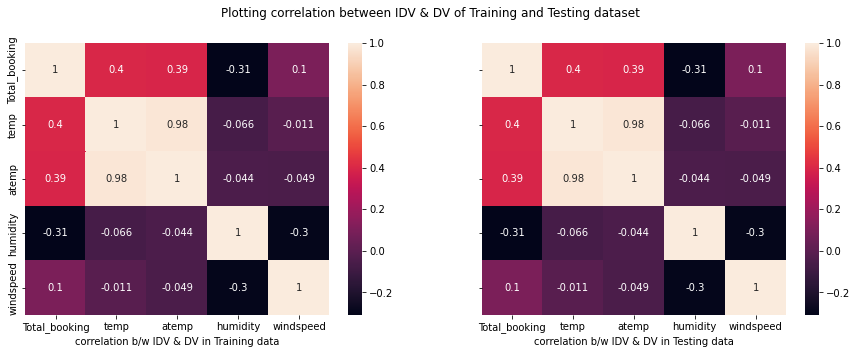

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Plotting correlation between IDV & DV of Training and Testing dataset')
sns.heatmap(ax=axes[0],data=training_data_corrMatrix,annot=True)
axes[0].set_xlabel("correlation b/w IDV & DV in Training data")
sns.heatmap(ax=axes[1],data=testing_data_corrMatrix,annot=True)
axes[1].set_xlabel("correlation b/w IDV & DV in Testing data")
plt.show();

#### Inference from correlation plot
##### 1. IDV - "temp" & "atemp" has positive correlation above 35% with the ID - "Total_booking" in Training and Testing dataset.
##### 2. IDV - "humidity" has negative correlation above 30% with the ID - "Total_booking" in Training and Testing dataset.
##### 3. IDV - "windspeed" has less positive correlation ie.,10% with the ID - "Total_booking" in Training and Testing dataset.

## 6. Perform Data Visualization: 
### a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well 
### b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)
### c. Use Histograms to plot all the continuous variables present in the data

#### Probability distribution plot on total_booking column of Traning & Testing dataset

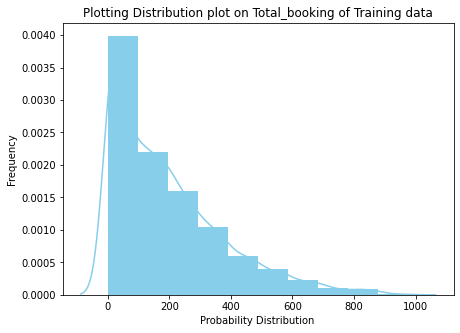

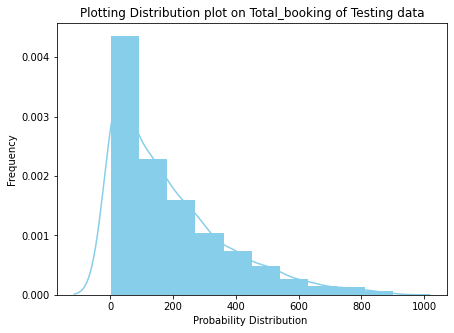

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.distplot(training_data['Total_booking'],
                  bins=10,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(title="Plotting Distribution plot on Total_booking of Training data")
ax.set(xlabel='Probability Distribution ', ylabel='Frequency')

plt.figure(figsize=(7,5))
ax = sns.distplot(testing_data['Total_booking'],
                  bins=10,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(title="Plotting Distribution plot on Total_booking of Testing data")
ax.set(xlabel='Probability Distribution ', ylabel='Frequency')

plt.show();

#### Visualizing Total_booking on all categorical features

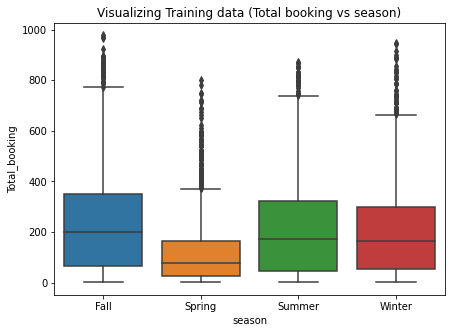

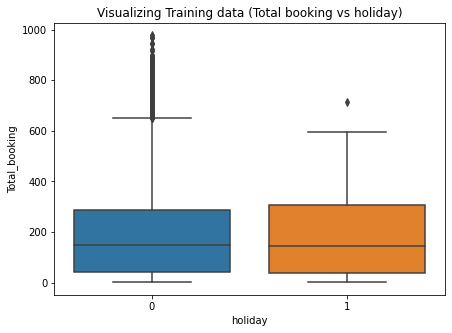

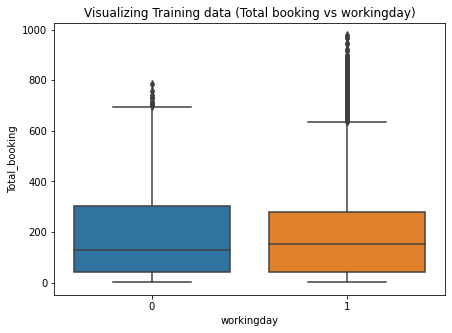

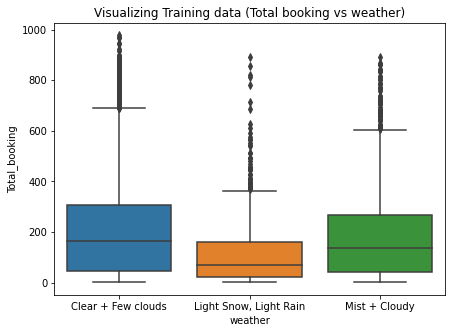

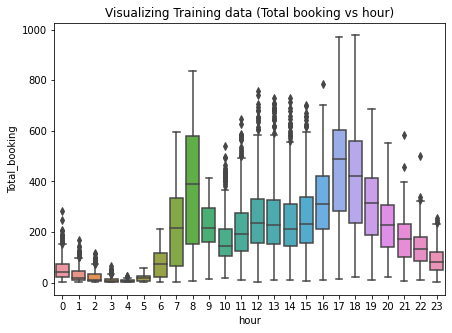

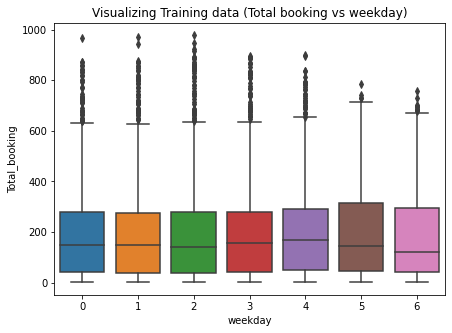

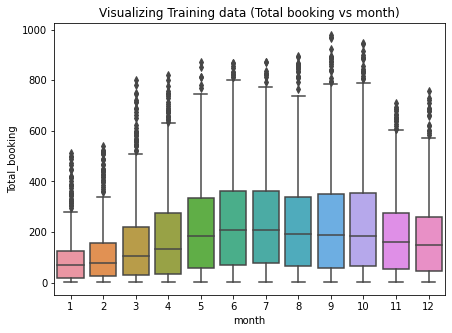

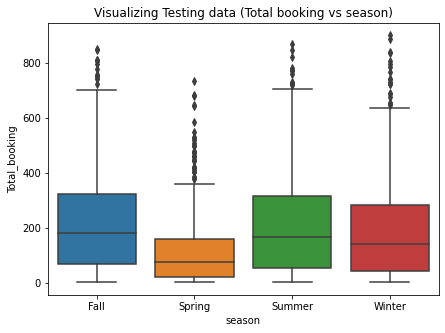

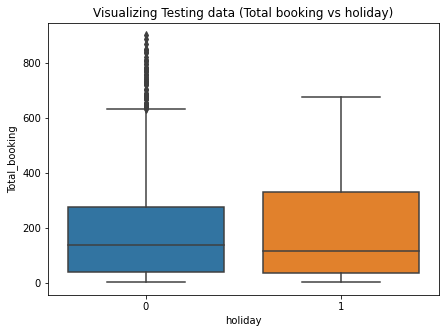

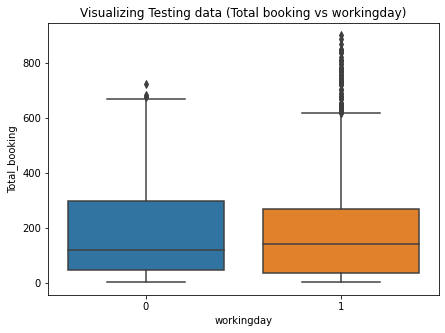

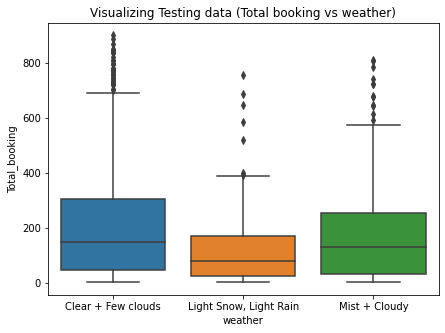

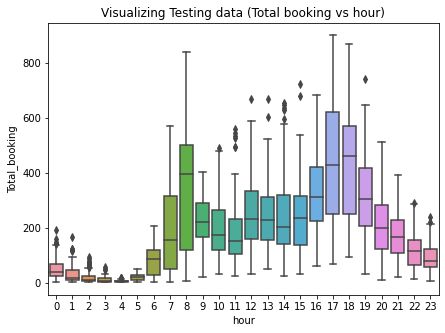

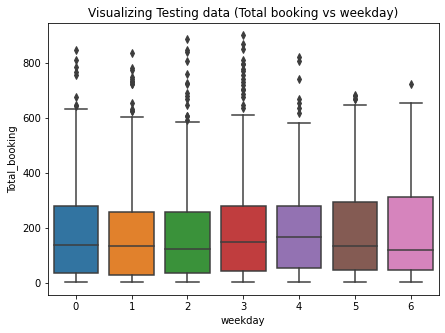

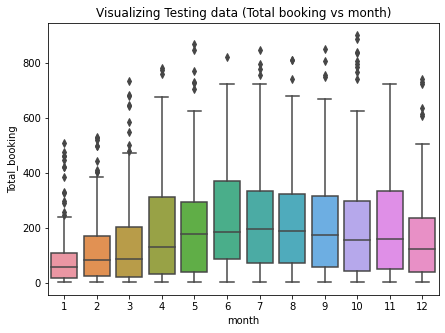

In [ ]:
cat_cols = ['season', 'holiday', 'workingday', 'weather', 'hour', 'weekday',
       'month']
for col in cat_cols:
  plt.figure(figsize=(7,5))
  plt.title("Visualizing Training data (Total booking vs "+col+')')
  sns.boxplot(y = 'Total_booking', x = col, data=training_data)

for col in cat_cols:
  plt.figure(figsize=(7,5))
  plt.title("Visualizing Testing data (Total booking vs "+col+')')
  sns.boxplot(y = 'Total_booking', x = col, data=testing_data)
plt.show();

#### Ploting Histogram on continuous variables present in the data.

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for temp of Training data')]

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for atemp of Training data')]

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for humidity of Training data')]

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for windspeed of Training data')]

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for temp of Testing data')]

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for atemp of Testing data')]

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for humidity of Testing data')]

<Figure size 504x360 with 0 Axes>

[Text(0.5, 1.0, 'Plotting Histogram for windspeed of Testing data')]

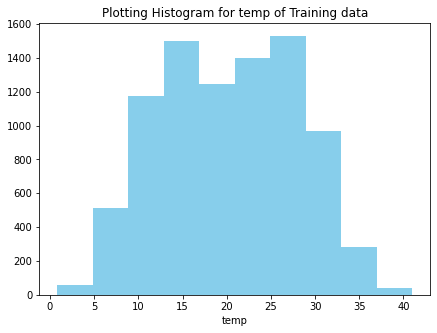

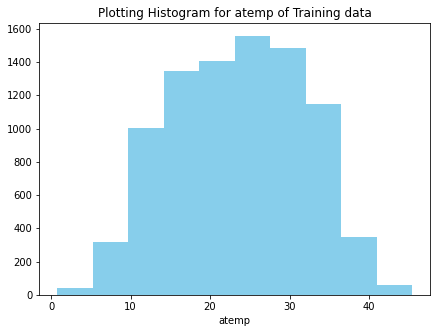

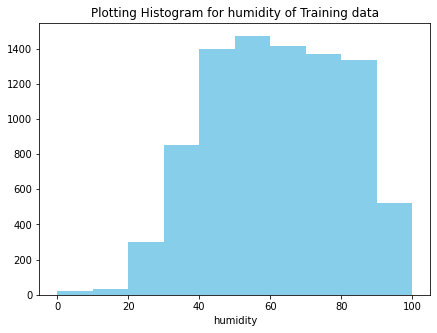

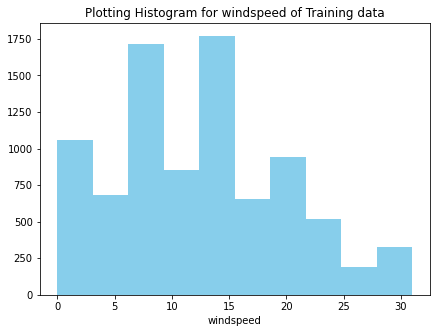

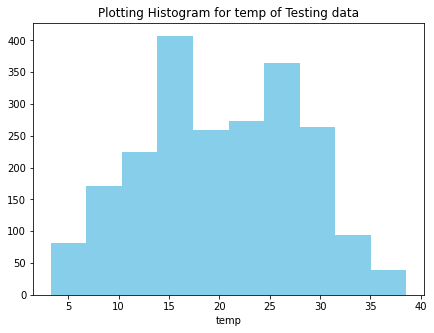

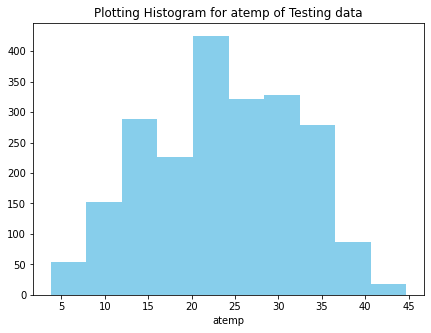

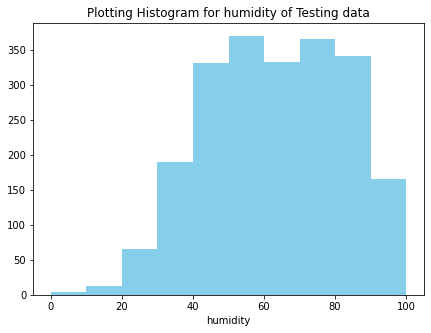

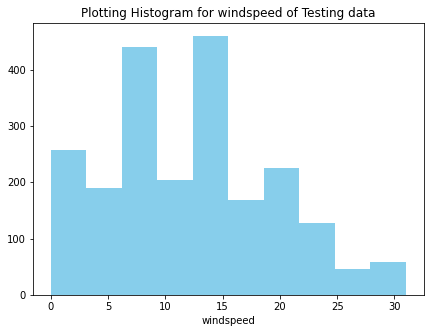

In [ ]:
num_cols = ['temp', 'atemp','humidity', 'windspeed']
for col in num_cols:
  plt.figure(figsize=(7,5))
  ax = sns.distplot(training_data[col],
                    bins=10,
                    kde=False,
                    color='skyblue',
                    hist_kws={"linewidth": 15,'alpha':1})
  ax.set(title="Plotting Histogram for " + col + ' of Training data' )

for col in num_cols:
  plt.figure(figsize=(7,5))
  ax = sns.distplot(testing_data[col],
                    bins=10,
                    kde=False,
                    color='skyblue',
                    hist_kws={"linewidth": 15,'alpha':1})
  ax.set(title="Plotting Histogram for " + col + ' of Testing data' )
  

## 7. Convert the categorical variables into one hot vector

#### Applying one hot encoding on both training and testing dataset

In [ ]:
training_data = pd.get_dummies(data=training_data,columns=['season','holiday','workingday','weather'],drop_first=True)
testing_data = pd.get_dummies(data=testing_data,columns=['season','holiday','workingday','weather'],drop_first=True)

## 8. Split your dataset for training and testing 

In [ ]:
training_data_X = training_data.drop('Total_booking',axis=1)
training_data_y = training_data['Total_booking']

testing_data_X = testing_data.drop('Total_booking',axis=1)
testing_data_y = testing_data['Total_booking']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(training_data_X,training_data_y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6095, 15), (2613, 15), (6095,), (2613,))

## 9. Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
br_reg = BaggingRegressor()
br_reg.fit(X_train,y_train)
kn_reg = KNeighborsRegressor()
kn_reg .fit(X_train,y_train)
sv_reg = SVR()
sv_reg.fit(X_train,y_train)

RandomForestRegressor()

BaggingRegressor()

KNeighborsRegressor()

SVR()

In [ ]:
rf_reg_y_predict = rf_reg.predict(X_test)
br_reg_y_predict = br_reg.predict(X_test)
kn_reg_y_predict = kn_reg.predict(X_test)
sv_reg_y_predict = sv_reg.predict(X_test)

In [ ]:
rf_reg_RMSE = round(np.sqrt(mean_squared_error(y_test,rf_reg_y_predict)),2)
br_reg_RMSE = round(np.sqrt(mean_squared_error(y_test,br_reg_y_predict)),2)
kn_reg_RMSE = round(np.sqrt(mean_squared_error(y_test,kn_reg_y_predict)),2)
sv_reg_RMSE = round(np.sqrt(mean_squared_error(y_test,sv_reg_y_predict)),2)
print('Random Forest Regressor RMSE is ',rf_reg_RMSE)
print('Bagging Regressor RMSE is ',br_reg_RMSE)
print('KNearest Neighbours Regressor RMSE is ',kn_reg_RMSE)
print('Support Vector Regressor RMSE is ',sv_reg_RMSE)

Random Forest Regressor RMSE is  41.81
Bagging Regressor RMSE is  43.65
KNearest Neighbours Regressor RMSE is  146.51
Support Vector Regressor RMSE is  186.91


## 10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm 

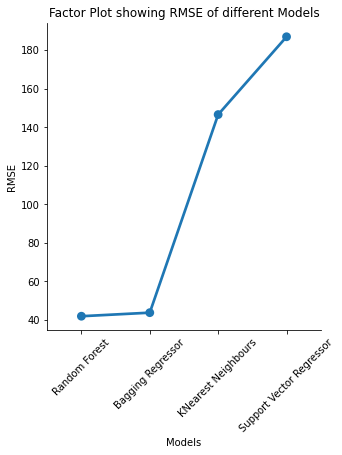

In [ ]:
data = {'RMSE' : [rf_reg_RMSE,br_reg_RMSE,kn_reg_RMSE,sv_reg_RMSE] ,
        'Models' : ['Random Forest','Bagging Regressor','KNearest Neighbours','Support Vector Regressor']}
Models_RMSE = pd.DataFrame(data)

ax = sns.factorplot(x ='Models', y ='RMSE', data = Models_RMSE)
ax.set(title="Factor Plot showing RMSE of different Models")
ax.set_xticklabels(rotation=45)
plt.show();

## 11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_

In [ ]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': [6, 8, 10, 12, 14, 16],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
rf_reg_tuned.best_params_

{'max_depth': 100, 'max_features': 14, 'n_estimators': 300}

## 12. Perform prediction on the test set and print the mean_squared_log_error

#### Prediction on the test set

In [ ]:
y_predict = rf_reg_tuned.predict(testing_data_X)

#### printing the mean_squared_log_error

In [ ]:
print("Mean_squared_log_error is: ", round(mean_squared_error(testing_data_y,y_predict),2))

Mean_squared_log_error is:  1538.55


#### DataFrame showing Actual & Predicted Value

In [ ]:
pd.DataFrame({'Actual_value' : testing_data_y,'Predicted_value' : y_predict})

,Actual_value,Predicted_value
0,256,236.576667
1,87,71.640000
2,11,36.946667
3,84,130.546667
4,668,615.110000
...,...,...
2173,3,3.806667
2174,144,130.356667
2175,159,134.083333
2176,29,23.936667


#<h1><center> **End**</center></h1>





